# Harmonic Generator

Se cargan tres librerías básicas
* os, para el manejo de los archivos entre carpetas, camnbios en las rutas etc...
* numpy y sicpy, para las funciones internas que se necesiten.

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

En este script, solo tenemos una sola función "swell_generator".
- Primero hacemos una iteración de todos los archivos de la carpeta que se generó en el script "Signal_Extractor.ipynb".
- Si la ruta es correcta, debería encontrae el archivo, una vez que se encuentra el archivo, para operar se manera más sencilla, se trabajan con señales normalizadas. En este caso se usará la normalizada por el RMS.
- Después simplemente se define el factor de amplitud de la señal, como es un swell, tendrá que ser mayor que la señal nominal en un período de tiempo, los valores están definidos en la norma IEEE 1159.


- ![](https://figures.semanticscholar.org/308ec64d75779240f7fcdcdb8a7787098c605edd/1-TableI-1.png)


- Se elimina el print del final para no generar los 3600 datos en pantalla.
- Respecto a los límites, para poder trabajar dentro de la norma, le vamos a amplicar armónicos entre 1 y 11 veces la frecuencia (50 Hz).

In [18]:
# Obtener el directorio actual del script
# directorio_actual = os.path.abspath(os.path.dirname(__file__)) Funcionaba cuando era un archivo '.py'
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'harmonic_signals')

# Creamos todas las carpetas antes de iniciar el bucle.

os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join('harmonic_signals', 'test'), exist_ok=True)
os.makedirs(os.path.join('harmonic_signals', 'train'), exist_ok=True)
os.makedirs(os.path.join('harmonic_signals', 'val'), exist_ok=True)

def harmonic_generator():
    total_signals = 3600
    num_iterations = 3  # Triplicar las señales
    signals_per_iteration = total_signals
    total_generated = num_iterations * signals_per_iteration
    
    for iteration in range(3):
        for i in range(3601):
            nombre_archivo = f"or_s_{i}.npy"
            ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

            if os.path.exists(ruta_archivo):
                # Cargar los datos desde el archivo .npy
                data = np.load(ruta_archivo)
                # Normalizar la señal al rango para una potencia unitaria RMS
                signal_original = data / np.sqrt(np.mean(data**2))

                # Parámetros del armónico
                tiempo = np.arange(len(signal_original)) / 10000  # Generar un vector de tiempo (tasa de muestreo de 10,000 Hz)
                num_harmonics = np.random.randint(1, 6)  # Generar un número aleatorio de armónicos (de 1 a 5)
                harmonic_amplitude = 0.1  # Amplitud del armónico

                # Generar la señal armónica sumando múltiples armónicos a la señal original
                harmonic_signal = np.zeros_like(signal_original)
                for _ in range(num_harmonics):
                    harmonic_freq = np.random.randint(1, 11) * 50  # Generar un armónico aleatorio entre 50 Hz y 500 Hz
                    harmonic_signal += harmonic_amplitude * np.sin(2 * np.pi * harmonic_freq * tiempo)

                # Sumar la señal armónica a la señal original
                signal_with_harmonic = signal_original + harmonic_signal

                # Determinar la carpeta de destino
                index_global = iteration * signals_per_iteration + i
                if index_global < 0.7 * total_generated:
                    directorio_destino_final = os.path.join(directorio_destino, 'train')
                elif index_global < 0.85 * total_generated:
                    directorio_destino_final = os.path.join(directorio_destino, 'test')
                else:
                    directorio_destino_final = os.path.join(directorio_destino, 'val')
            
                # Usar index_global + 1 para nombres de archivo, comenzando desde 1
                nombre_archivo_nuevo = f"hrc_s_{index_global}.npy"
                ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
                np.save(ruta_archivo_nuevo, signal_with_harmonic)

harmonic_generator()

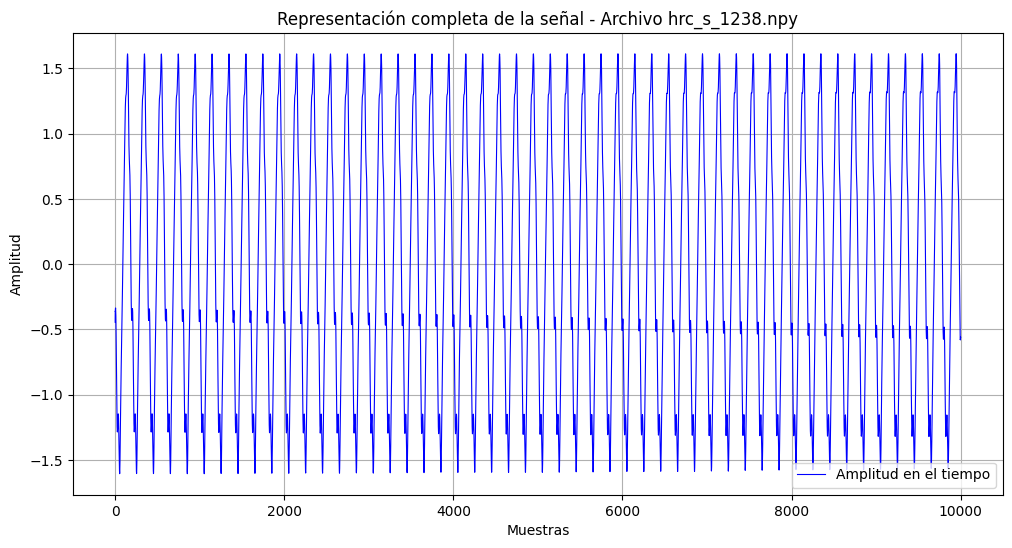

In [19]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 2000)
archivo_path = os.path.join(os.getcwd(), 'harmonic_signals', 'train' , f'hrc_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo hrc_s_{archivo_numero}.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()